In [5]:
import os,sys,inspect
sys.path.insert(1, os.path.join(sys.path[0], '..'))

In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
import env.env as env
import numpy as np

In [8]:
import random
height=4 
width=4

In [9]:
states = [[i, j] for i in range(4) for j in range(4)]

In [10]:
#One Episodestartx=random.randint(0,3)
grid=env.Grid_game(height,width)
Counter=np.zeros((width,height))
#starty=0
#startx=3
history=[]
Returns=np.zeros((height,width))
rewards=0
k=0.8

y,x=grid.player.curpos

num_episodes=10000
for i in range(num_episodes):
    state_list=[]
    starty,startx = random.choice(states[1:-1])
    grid.set_pos(starty,startx)
    iteration=0
    rewards=0
    while(not grid.state):
        iteration+=1
        state_list.append(grid.player.curpos[:])
        state,cur_state,reward,_=grid.transition()
        
#    print(state_list)
    state_list.reverse()   
 #   print(state_list[1:])
    G=0
    for pos in state_list[1:]:
        
        G=G*k+(grid.fix_reward_val)
        Counter[pos[0]][pos[1]]+=1
        grid.vst[pos[0]][pos[1]]=grid.vst[pos[0]][pos[1]]+(0.001)*(G-grid.vst[pos[0]][pos[1]])
     #   grid.vst[pos[0]][pos[1]]=grid.vst[pos[0]][pos[1]]+(1/Counter[pos[0]][pos[1]])*(G-grid.vst[pos[0]][pos[1]])
  #  print(grid.vst)
    grid.vst=np.round(grid.vst,3)
    history.append(grid.vst[:].copy())
        




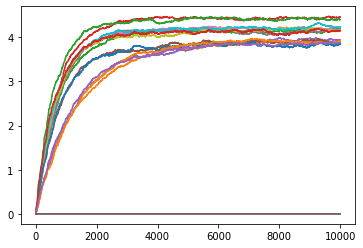

In [11]:
import matplotlib.pyplot as plt

history=np.array(history).reshape(num_episodes,16)
for i in range(16):
    plt.plot(history[0:num_episodes,i]*-1)

In [20]:
grid.vst

array([[ 0.   , -3.87 , -4.149, -4.465],
       [-3.945, -3.865, -4.222, -4.206],
       [-4.163, -4.233, -3.854, -3.916],
       [-4.399, -4.152, -3.879,  0.   ]])

In [21]:
import env.utils as utils

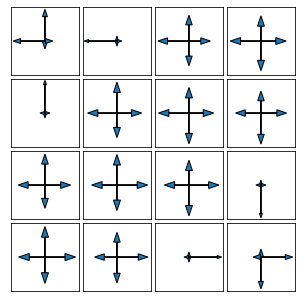

In [22]:
utils.vst_value(grid)

In [39]:


grid=env.Grid_game(height,width)
Counter=np.zeros((width,height))
#starty=0
#startx=3
history=[]

Returns=np.zeros((height,width))
rewards=0
k=0.8

y,x=grid.player.curpos

num_episodes=100000
for i in range(num_episodes):
    state_list=[]
    action_list=[]
    starty,startx = random.choice(states[1:-1])
    grid.set_pos(starty,startx)
    iteration=0
    rewards=0
    while(not grid.state):
        iteration+=1
        state,cur_state,reward,action=grid.transition()
        action_list.append(action)
        state_list.append(grid.player.oldpos[:])
#    print(state_list)
    state_list.reverse()   
 #   print(state_list[1:])
    
    G=0
    for act,pos in zip(action_list,state_list):
        
        G=G*k+(grid.fix_reward_val)
        Counter[pos[0]][pos[1]]+=1
        grid.ast[act][pos[0]][pos[1]]=grid.ast[act][pos[0]][pos[1]]+(0.0001)*(G-grid.ast[act][pos[0]][pos[1]])
    grid.ast=np.round(grid.ast,3)
  #  print(grid.vst)
    
    history.append(grid.vst[:].copy())
        

In [40]:
grid.ast

array([[[-0.   , -2.68 , -3.722, -4.067],
        [-2.487, -3.05 , -3.409, -3.62 ],
        [-3.432, -3.288, -2.962, -2.545],
        [-3.78 , -3.412, -2.415, -0.   ]],

       [[-0.   , -2.356, -3.421, -3.783],
        [-2.524, -2.944, -3.329, -3.423],
        [-3.594, -3.412, -3.021, -2.501],
        [-4.031, -3.716, -2.692, -0.   ]],

       [[-0.   , -2.512, -3.595, -4.043],
        [-2.397, -2.97 , -3.421, -3.719],
        [-3.378, -3.28 , -3.061, -2.693],
        [-3.771, -3.443, -2.485, -0.   ]],

       [[-0.   , -2.516, -3.449, -3.759],
        [-2.658, -3.001, -3.315, -3.412],
        [-3.685, -3.438, -2.994, -2.401],
        [-4.047, -3.608, -2.536, -0.   ]]])

[0.25 0.25 0.25 0.25]
[0.21592203 0.23910849 0.32665919 0.21831029]
[0.24860633 0.21591194 0.29349795 0.24198377]
[0.29658092 0.23051596 0.2545049  0.21839822]
[0.28430204 0.137282   0.13741935 0.44099661]
[0.26764427 0.22921461 0.30206999 0.20107113]
[0.37472031 0.18276111 0.2467017  0.19581688]
[0.19436396 0.33688192 0.25157282 0.2171813 ]
[0.24534699 0.28363083 0.23244962 0.23857256]
[0.22825725 0.21669119 0.25454389 0.30050767]
[0.3289256  0.26903234 0.18527322 0.21676885]
[0.195642   0.34079682 0.20444244 0.25911875]
[0.21997525 0.24901548 0.28643598 0.2445733 ]
[0.23512397 0.26167752 0.26404325 0.23915525]
[0.17339368 0.25738283 0.43076582 0.13845766]
[0.25 0.25 0.25 0.25]


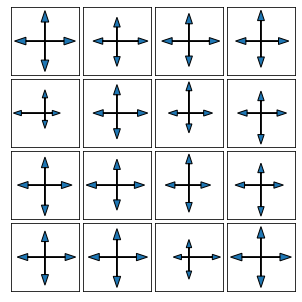

In [38]:
utils.ast_value(grid)

In [308]:
np.add((3,4),(1,2))

array([4, 6])

In [26]:
action_index=random.choice(list(enumerate([0.5,0.0,0.5,0.0])))[0]
action_index

3

In [55]:
np.random.choice(4, 10, p=grid.policy)

ValueError: 'p' must be 1-dimensional